# Neural Networks
### Alicia Brown
#### 143960

### Paquetes necesarios

In [1]:
import pandas as pd
import numpy as np
import csv
import random as rnd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
%matplotlib inline
import tensorflow as tf

## Regresión logística (perceptrón con sigmoide)

### Función AND

In [2]:
def AND(x1,x2):
    if x1==1 and x2 == 1:
        return 1
    else:
        return 0

In [3]:
def clasifica(y):
    if y >= 0.5:
        return 1
    else:
        return 0

In [4]:
def salida(w,X):
    return X.dot(w[1:])+w[0]

In [5]:
def entrena(X,y,w,la=0.0,eta=0.01):
    for i in range(len(X)):
        y_hat=clasifica(salida(w,X[i]))
        error=y[i]-y_hat
        w[0]=w[0]+eta*(error)
        w[1:]=w[1:]+eta*(error*X[i])-la*w[1:]
    return w

In [6]:
def calcError(X,y,w,w0):
    return np.mean((X.dot(w)+w0-y)**2)

#### Generar datos

In [7]:
x1=np.random.randint(2, size=10000)
x2=np.random.randint(2, size=10000)
x1.resize(10000,1)
x2.resize(10000,1)
X = np.concatenate((x1,x2),axis=1)

In [8]:
y = []
for i in range(len(X)):
    y.append(AND(X[i,0],X[i,1]))

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,y, train_size=0.75)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/sklearn/model_selection/_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [10]:
X_train=np.asarray(X_train)
X_test=np.asarray(X_test)
Y_train=np.asarray(Y_train)
Y_test=np.asarray(Y_test)

#### Prueba

In [11]:
w=np.asarray([rnd.random() for i in range(1+len(X_train[0]))])
for i in range(100):
    w=entrena(X_train,Y_train,w,la=0.00)
print w

[ 0.19164033  0.12052725  0.29678875]


In [12]:
print calcError(X_train,Y_train.flatten(),w[1:],w[0])
print calcError(X_test,Y_test.flatten(),w[1:],w[0])

0.131464183479
0.132715230722


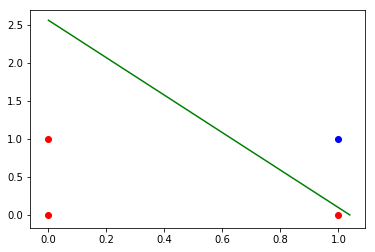

In [13]:
xx1 = -(w[0]-0.5)/w[1]
xx2 = -(w[0]-0.5)/w[2]
plt.plot([0, xx2], [xx1,0], c='g')   
plt.scatter(0,0,c="r")
plt.scatter(0,1,c="r")
plt.scatter(1,0,c="r")
plt.scatter(1,1,c="b")
plt.show()

In [14]:
y_hat = salida(w,X_test)
pred = []
for i in range(len(y_hat)):
    if y_hat[i] >= 0.5:
        pred.append(1)
    else:
        pred.append(0)

In [15]:
confusion_matrix(Y_test,pred, labels=None, sample_weight=None)

array([[1848,    0],
       [   0,  652]])

### Función XOR

In [16]:
def XOR(x1,x2):
    if (x1==x2):
        return 0
    else:
        return 1

#### Generar datos

In [17]:
y2 = []
for i in range(len(X)):
    y2.append(XOR(X[i,0],X[i,1]))

In [18]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X,y2, train_size=0.75)

In [19]:
X_train2=np.asarray(X_train2)
X_test2=np.asarray(X_test2)
Y_train2=np.asarray(Y_train2)
Y_test2=np.asarray(Y_test2)

In [20]:
print X_train2, Y_train2

[[0 1]
 [0 1]
 [1 0]
 ..., 
 [0 1]
 [0 1]
 [1 1]] [1 1 1 ..., 1 1 0]


#### Prueba

In [21]:
w2=np.asarray([rnd.random() for i in range(1+len(X_train2[0]))])
for i in range(100):
    w2=entrena(X_train2,Y_train2,w2,la=0.00)
print w2

[ 0.49973615 -0.00587684 -0.00457478]


In [22]:
print calcError(X_train2,Y_train2,w2[1:],w2[0])
print calcError(X_test2,Y_test2,w2[1:],w2[0])

0.249912161407
0.250184840922


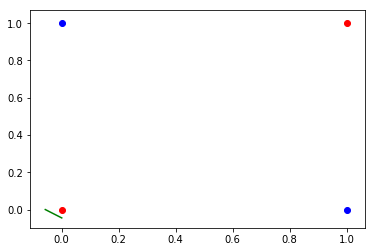

In [23]:
xxx1 = -(w2[0]-0.5)/w2[1]
xxx2 = -(w2[0]-0.5)/w2[2]
plt.plot([0, xxx2], [xxx1,0], c='g')   
plt.scatter(0,0,c="r")
plt.scatter(0,1,c="b")
plt.scatter(1,0,c="b")
plt.scatter(1,1,c="r")
plt.show()

In [24]:
y_hat2 = salida(w2,X_test2)
pred2 = []
for i in range(len(y_hat2)):
    if y_hat2[i] >= 0.5:
        pred2.append(1)
    else:
        pred2.append(0)

In [25]:
confusion_matrix(Y_test2,pred2, labels=None, sample_weight=None)

array([[1241,    0],
       [1259,    0]])

### ANN para función XOR

In [47]:
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.random_uniform([2, 2], -1, 1))
b1 = tf.Variable(tf.zeros([2]))
W2 = tf.Variable(tf.random_uniform([2, 1], -1, 1))
b2 = tf.Variable(tf.zeros([1]))

In [48]:
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
yhat = tf.nn.sigmoid(tf.matmul(h, W2) + b2)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.01).minimize(ecm)

In [49]:
X = np.asarray([[0,0], [0,1], [1,0], [1,1]])
Y = np.asarray([[0], [1], [1], [0]])

In [50]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(100000):
    sess.run(train_step, feed_dict={x: X, y: Y})

In [51]:
correct_prediction = tf.equal(tf.round(yhat), y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y: Y}))

1.0


In [32]:
yhat_ = [sess.run(yhat, feed_dict={x: X, y: Y})][0]
W1_ = [sess.run(W1)][0]
b1_ = [sess.run(b1)][0]
W2_ = [sess.run(W2)][0]
b2_ = [sess.run(b2)][0]
err_ = [sess.run(ecm, feed_dict={x: X, y: Y})][0]
print 'yhat ', yhat_
print 'W1 ', W1_
print 'b1 ', b1_
print 'W2 ', W2_
print 'b2 ', b2_
print 'Error ', err_

yhat  [[ 0.03083263]
 [ 0.96534836]
 [ 0.97065955]
 [ 0.02738982]]
W1  [[ 5.9874444   5.08923149]
 [-5.91412783 -5.31059027]]
b1  [ 3.03332114 -2.75796795]
W2  [[-8.08554363]
 [ 8.59052658]]
b2  [ 3.75388169]
Error  0.00376245


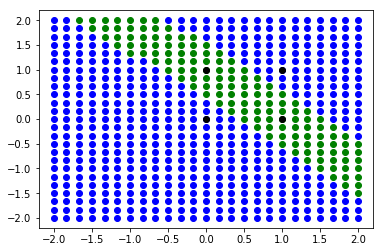

In [62]:
xs = np.linspace(-2, 2,25)
ys = np.linspace(-2, 2,25)
pred_classes = []
for i in xs:
    for j in ys:
        pred_class = sess.run(yhat, feed_dict={x: [[i, j]]})
        pred_classes.append((i, j, np.around(pred_class)))
xs_p, ys_p = [], []
xs_n, ys_n = [], []
for i, j, c in pred_classes:
    if c == 0.:
        xs_n.append(i)
        ys_n.append(j)
    else:
        xs_p.append(i)
        ys_p.append(j)
plt.plot(xs_p, ys_p, 'go', xs_n, ys_n, 'bo', X[:,0], X[:,1], 'ko')
plt.show()

### ANN para puntos dentro del círculo

In [63]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
x = tf.placeholder(tf.float32, [None, 2])
y = tf.placeholder(tf.float32, [None, 1])
W1 = tf.Variable(tf.random_uniform([2, 3], -1, 1))
b1 = tf.Variable(tf.zeros([1, 3]))
W2 = tf.Variable(tf.random_uniform([3, 1], -1, 1))
b2 = tf.Variable(tf.zeros([1, 1]))

In [64]:
h = tf.nn.sigmoid(tf.matmul(x, W1) + b1)
yhat = tf.nn.sigmoid(tf.matmul(h, W2) + b2)
ecm = tf.reduce_mean(tf.reduce_sum(tf.square(y - yhat)))
train_step = tf.train.GradientDescentOptimizer(0.03).minimize(ecm)

In [65]:
n = 1000
X1 = np.resize(np.random.uniform(-2, 2, n), (n,1))
X2 = np.resize(np.random.uniform(-2, 2, n), (n,1))

In [66]:
def circulo(X1, X2):
    if X1*X1 + X2*X2 < 1:
        return 1
    else:
        return 0

In [67]:
X = np.concatenate((X1, X2), axis = 1)
Y = np.resize([circ(X1[i], X2[i]) for i in range(len(X1))], (n,1))

In [68]:
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
for k in range(10000):
    sess.run(train_step, feed_dict={x: X, y: Y})

In [69]:
correct_prediction = tf.equal(tf.round(yhat), y)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y: Y}))

0.965


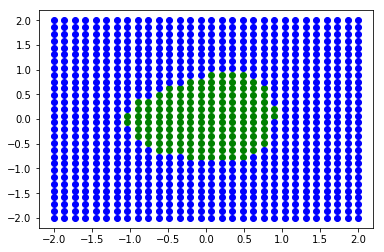

In [72]:
xs = np.linspace(-2, 2,30)
ys = np.linspace(-2, 2,30)
pred_classes = []
for i in xs:
    for j in ys:
        pred_class = sess.run(yhat, feed_dict={x: [[i, j]]})
        pred_classes.append((i, j, np.around(pred_class)))
xs_p, ys_p = [], []
xs_n, ys_n = [], []
for i, j, c in pred_classes:
    if c == 0.:
        xs_n.append(i)
        ys_n.append(j)
    else:
        xs_p.append(i)
        ys_p.append(j)
plt.plot(xs_p, ys_p, 'go', xs_n, ys_n, 'bo')
plt.show()